In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

%matplotlib inline

In [3]:
#Read csv file
rape_victims = pd.read_csv("crime/20_Victims_of_rape.csv")

In [4]:
#DataCleaning
#removing Total rape victims subgroup
rape_victims = rape_victims[rape_victims['Subgroup'] != 'Total Rape Victims']

rape_victims[rape_victims['Victims_of_Rape_Total'] != rape_victims['Rape_Cases_Reported']]

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67
290,Delhi,2007,Victims of Other Rape,580,1,92,219,174,24,584,74
293,Delhi,2008,Victims of Other Rape,429,2,83,127,123,29,433,69
308,Goa,2003,Victims of Other Rape,31,0,9,8,7,2,32,6
326,Goa,2009,Victims of Other Rape,46,0,11,20,15,2,49,1
335,Gujarat,2002,Victims of Other Rape,257,0,12,41,174,17,258,14


We can conclude : <b>*Not all Cases are reported*</b>

In [5]:
rape_victims['Unreported_Cases'] = rape_victims['Victims_of_Rape_Total'] - rape_victims['Rape_Cases_Reported']

rape_victims[rape_victims['Unreported_Cases'] > 0].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0,1
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45,2
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31,4
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49,8
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67,3


# Obtain data on state with most number of unreported victims

Text(0, 0.5, 'Total Number of Unreported Rape Victims from 2001 to 2010')

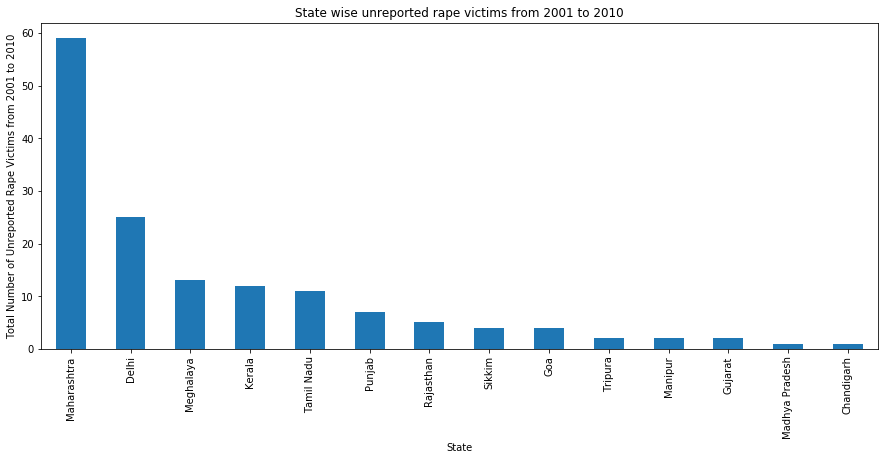

In [6]:
Unreported_Victims_by_state = rape_victims.groupby('Area_Name').sum()
Unreported_Victims_by_state.drop('Year', axis = 1, inplace = True)

#Making data more presentable
plt.subplots(figsize = (15,6))
Sort_acc_to_unreported = Unreported_Victims_by_state[Unreported_Victims_by_state['Unreported_Cases'] > 0]['Unreported_Cases'].sort_values(ascending = False)

#Plotting
axis = Sort_acc_to_unreported.plot.bar()
axis.set_title('State wise unreported rape victims from 2001 to 2010')
axis.set_xlabel('State')
axis.set_ylabel('Total Number of Unreported Rape Victims from 2001 to 2010')

Maharastra has the most number of unreported victims 

# Generating a heat map for states based on the age group o victims

Text(0.5, 1.0, 'Statewise age group of rape victims')

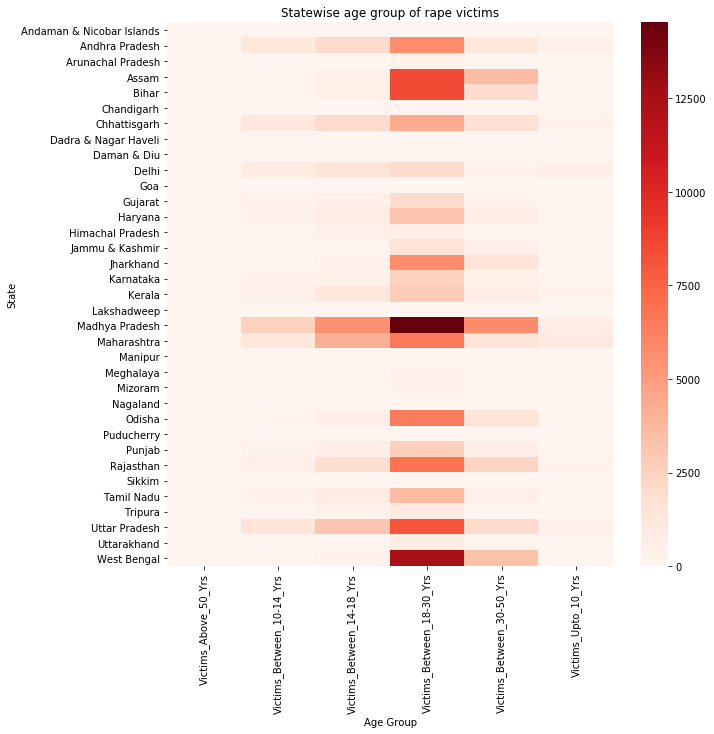

In [7]:
rape_victims_by_state = rape_victims.groupby('Area_Name').sum()
rape_victims_by_state.drop('Year' , axis =1 , inplace = True)
rape_victims_by_state.sort_values(by = 'Rape_Cases_Reported', ascending =False)
victims_heatmap = rape_victims_by_state.drop(['Rape_Cases_Reported','Victims_of_Rape_Total','Unreported_Cases'], axis = 1)

plt.subplots(figsize = (10,10))
Heatmap = sns.heatmap(victims_heatmap, cmap='Reds')
Heatmap.set_xlabel('Age Group')
Heatmap.set_ylabel("State")
Heatmap.set_title('Statewise age group of rape victims')

# Exploring Data of Madhya Pradesh

In [8]:
MP_rape_victims = rape_victims[rape_victims['Area_Name'] == 'Madhya Pradesh']


# Yearly plot of number of rape victims in MP

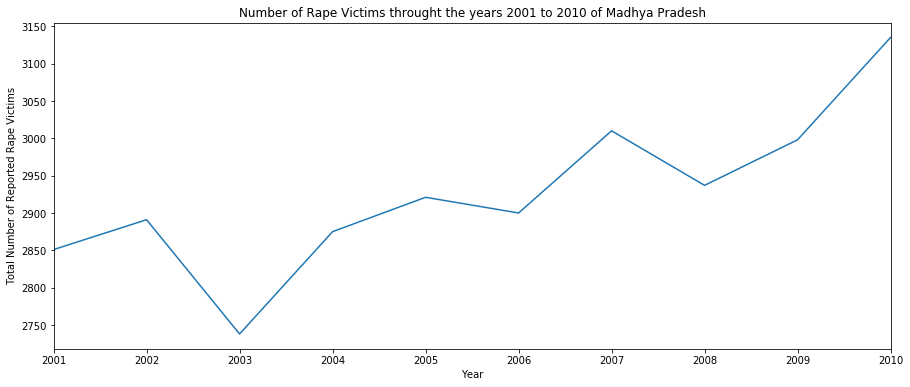

In [9]:
MP_rape_victims_by_year = MP_rape_victims.groupby('Year').sum()
plt.subplots(figsize = (15,6))
disp = MP_rape_victims_by_year['Rape_Cases_Reported'].plot()
disp.xaxis.set_ticks(np.arange(2001,2011,1))
disp.set(xlabel = "Year", ylabel = 'Total Number of Reported Rape Victims', 
       title = 'Number of Rape Victims throught the years 2001 to 2010 of Madhya Pradesh')
plt.show()

# Exploring Data for West Bengal

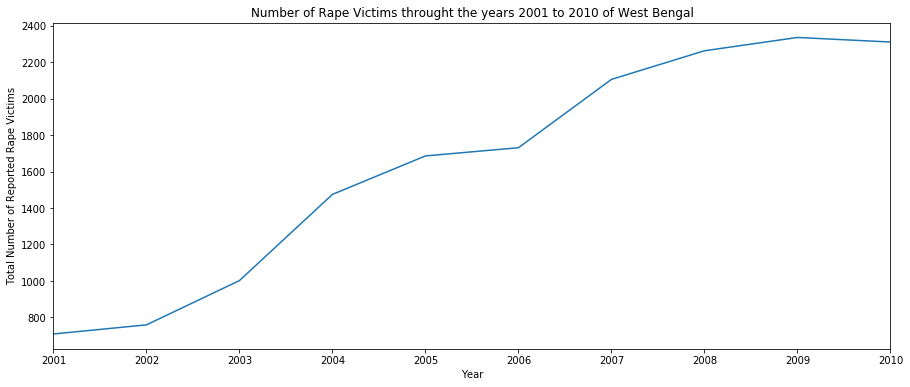

In [10]:
wb_rape_victims = rape_victims[rape_victims['Area_Name'] == 'West Bengal']

# Let's have a look at yearly distribution of number of rape victims in West Bengal
wb_rape_victims_by_year = wb_rape_victims.groupby('Year').sum()

# plotting the data
plt.subplots(figsize = (15, 6))
ax = wb_rape_victims_by_year['Rape_Cases_Reported'].plot()
ax.xaxis.set_ticks(np.arange(2001, 2011, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Reported Rape Victims',
       title = 'Number of Rape Victims throught the years 2001 to 2010 of West Bengal')
plt.show()

# Comparison  of Madhya Pradesh and West Bengal

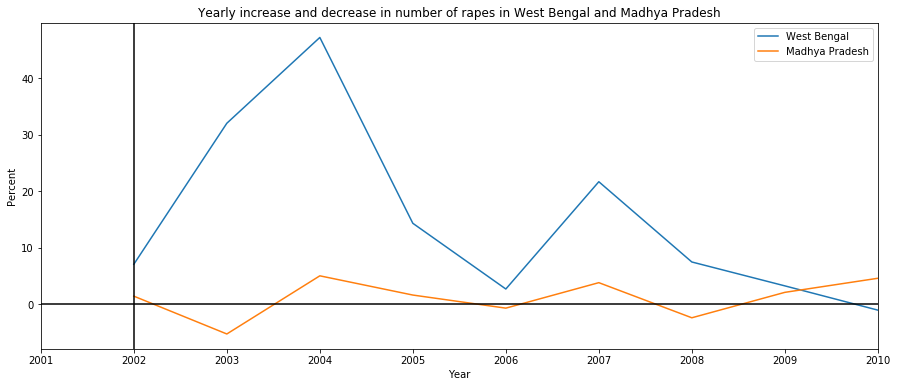

Overall Increase in number of rapes in West Bengal = 69.32 Percent
Overall Increase in number of rapes in Madhya Pradesh = 12.29 Percent


In [11]:
plt.subplots(figsize = (15, 6))
ax = (wb_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(legend = True, 
                                                                              label = 'West Bengal')
(MP_rape_victims_by_year['Rape_Cases_Reported'].pct_change() * 100).plot(ax = ax, legend = True, 
                                                                         label = 'Madhya Pradesh')
ax.set(xlabel = 'Year', ylabel = 'Percent', 
       title = 'Yearly increase and decrease in number of rapes in West Bengal and Madhya Pradesh')
ax.axhline(0, color = 'black')
ax.axvline(2002, color = 'black')
plt.show()
print('Overall Increase in number of rapes in West Bengal =', 
      '{0:.2f}'.format(((wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - wb_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')
print('Overall Increase in number of rapes in Madhya Pradesh =', 
      '{0:.2f}'.format(((MP_rape_victims_by_year.iloc[9]['Rape_Cases_Reported'] 
                         - MP_rape_victims_by_year.iloc[0]['Rape_Cases_Reported'])
                        /wb_rape_victims_by_year.iloc[9]['Rape_Cases_Reported']) * 100), 'Percent')

We can clearly see that overall increase in west bengal is much higher. Also, it's clear that the increase is consistant in West Bengall till 2010.

However, in Madhya Pradesh, there's both increase and decrease in the number of rapes throught the years. Although the overall number of rapes is much higher than that of West Bengal, but the percentage of increase/decrease says that Madhya pradesh is a much safer state.